In [46]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [47]:
titanic_data=fetch_openml(name='titanic',version=1, as_frame=True)


In [48]:
df=titanic_data['data']

In [49]:
df['survived']=titanic_data['target']

In [50]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [51]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0 ,'travelled_alone']=0
df.loc[df['family']==0 ,'travelled_alone']=0

In [52]:
df['family'].head()

,family
0,0
1,3
2,3
3,3
4,3


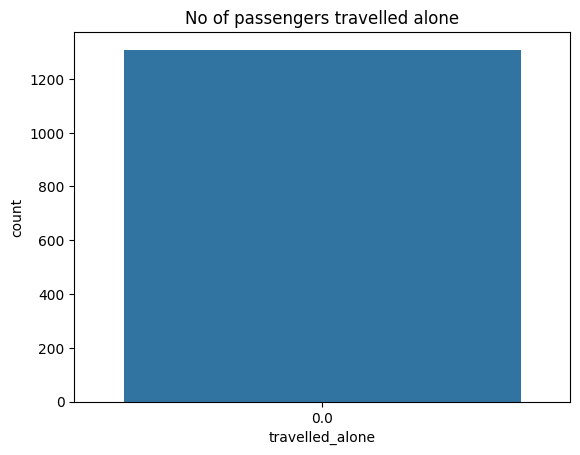

In [53]:
df.drop(['sibsp','parch'],axis=1,inplace=True)
sns.countplot(x='travelled_alone',data=df)
plt.title("No of passengers travelled alone")
plt.show()

<Axes: xlabel='survived', ylabel='count'>

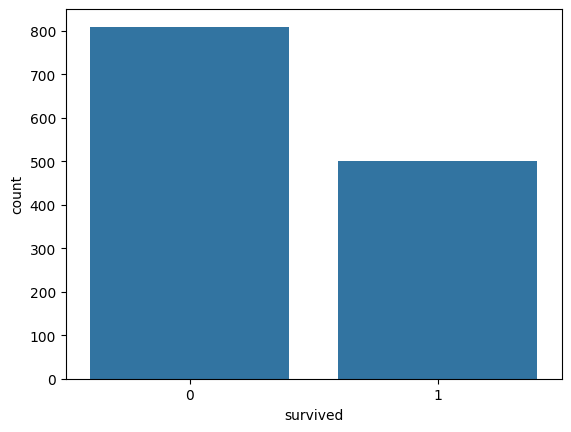

In [54]:
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

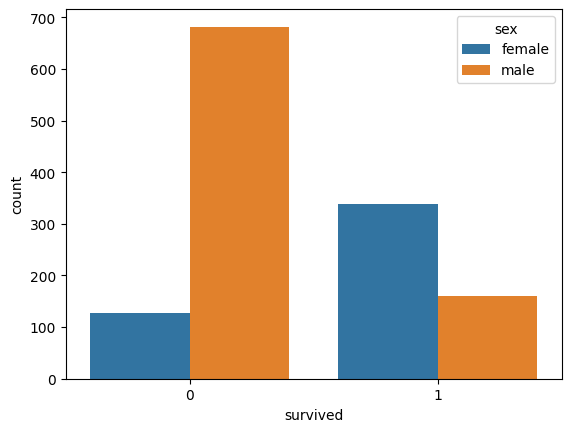

In [55]:
sns.countplot(x='survived',data=df,hue="sex")

<Axes: xlabel='survived', ylabel='count'>

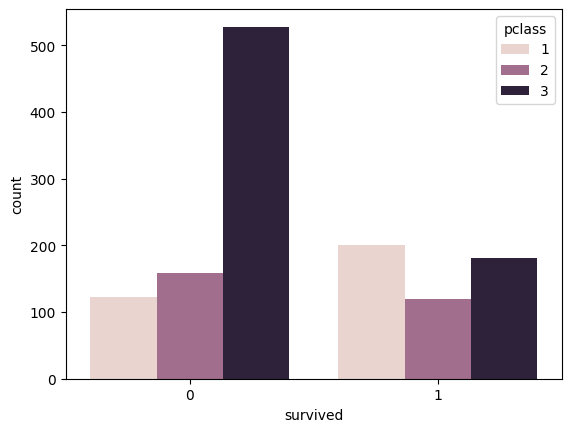

In [56]:
sns.countplot(x='survived',data=df,hue="pclass")

<Axes: ylabel='Frequency'>

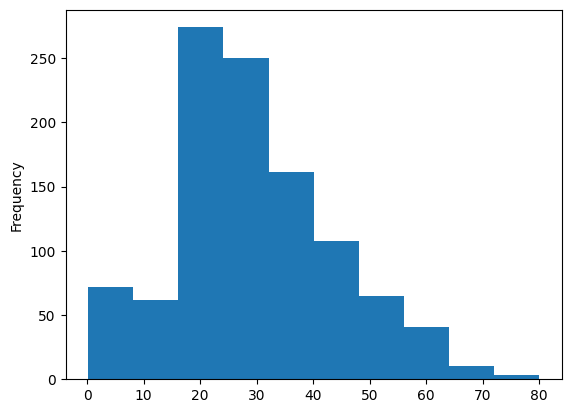

In [57]:
df['age'].plot.hist()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pclass           1309 non-null   int64   
 1   name             1309 non-null   object  
 2   sex              1309 non-null   category
 3   age              1046 non-null   float64 
 4   ticket           1309 non-null   object  
 5   fare             1308 non-null   float64 
 6   cabin            295 non-null    object  
 7   embarked         1307 non-null   category
 8   boat             486 non-null    object  
 9   body             121 non-null    float64 
 10  home.dest        745 non-null    object  
 11  survived         1309 non-null   category
 12  family           1309 non-null   int64   
 13  travelled_alone  1309 non-null   float64 
dtypes: category(3), float64(4), int64(2), object(5)
memory usage: 116.8+ KB


In [59]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
ticket,0
fare,1
cabin,1014
embarked,2
boat,823
body,1188


<Axes: title={'center': 'missing values in %'}, ylabel='%'>

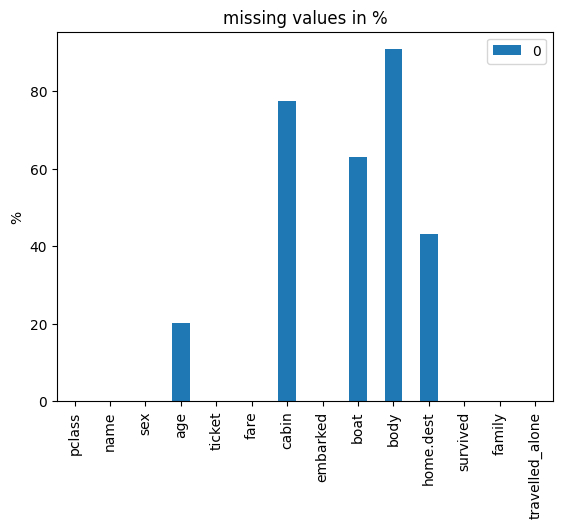

In [60]:
miss_vals=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_vals.plot(kind='bar',title="missing values in %",ylabel="%")

In [61]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [62]:
df.drop(['name','ticket','home.dest'],axis=1,inplace=True)


In [63]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travelled_alone
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,0.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [64]:
df.drop(['cabin','body','boat'],axis=1,inplace=True)

In [65]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,0.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [68]:
sex=pd.get_dummies(df['sex'],drop_first=True)
print(sex)

       True
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [69]:
df['sex']=sex

In [70]:
df.isnull().sum()

,0
pclass,0
sex,0
age,263
fare,1
embarked,2
survived,0
family,0
travelled_alone,0


In [71]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy='mean')

In [72]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [73]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
travelled_alone,0


In [74]:
imp_freq=SimpleImputer(strategy='most_frequent')

In [75]:
df['embarked']=imp_freq.fit_transform(df[['embarked']]).ravel()

In [76]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,0
survived,0
family,0
travelled_alone,0


In [77]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,False,29.0000,211.3375,S,1,0,0.0
1,1,True,0.9167,151.5500,S,1,3,0.0
2,1,False,2.0000,151.5500,S,0,3,0.0
3,1,True,30.0000,151.5500,S,0,3,0.0
4,1,False,25.0000,151.5500,S,0,3,0.0


In [78]:
embark=pd.get_dummies(df['embarked'],drop_first=True)
print(embark)

          Q      S
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False  False
1305  False  False
1306  False  False
1307  False  False
1308  False   True

[1309 rows x 2 columns]


In [79]:
df.drop(['embarked'],axis=1,inplace=True)
df=pd.concat([df,embark],axis=1)


In [80]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,False,29.0000,211.3375,1,0,0.0,False,True
1,1,True,0.9167,151.5500,1,3,0.0,False,True
2,1,False,2.0000,151.5500,0,3,0.0,False,True
3,1,True,30.0000,151.5500,0,3,0.0,False,True
4,1,False,25.0000,151.5500,0,3,0.0,False,True


In [85]:
X=df.drop(['survived'],axis=1)
X.head()

,pclass,sex,age,fare,family,travelled_alone,Q,S
0,1,False,29.0000,211.3375,0,0.0,False,True
1,1,True,0.9167,151.5500,3,0.0,False,True
2,1,False,2.0000,151.5500,3,0.0,False,True
3,1,True,30.0000,151.5500,3,0.0,False,True
4,1,False,25.0000,151.5500,3,0.0,False,True


In [86]:
y=df['survived']
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


In [87]:
from sklearn.model_selection import train_test_split


In [88]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
print(X_train.shape,y_train.shape)

(916, 8) (916,)


In [90]:
print(X_test.shape,y_test.shape)

(393, 8) (393,)


In [91]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(X_train,y_train)

LogisticRegression()

In [93]:
pred=mod.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8040712468193384

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[203,  21],
       [ 56, 113]])